1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [157]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [158]:
# generate regression dataset
X, y = make_regression(random_state=0)
y

array([ 5.89981499e+01, -1.51472301e+02,  3.92774675e+00,  1.30275835e+02,
        2.04728060e+00,  1.01587138e+02, -1.81389163e+02, -1.99827729e+02,
        2.36839440e+02,  3.00206479e+02,  2.71801441e+01,  2.76530071e+01,
        4.44317863e+01, -2.97416896e+01, -1.65646056e+02,  1.06302533e+02,
       -2.38325493e+02, -1.27217684e+02, -1.49696870e+02,  3.91961166e+01,
       -3.38549645e+00,  1.44280015e+02, -6.77946699e+01, -8.78067763e+01,
        2.59043702e+02, -1.98514664e+02,  1.24378523e+01, -7.03056179e+01,
        1.53948181e+02, -1.12712395e+02,  6.01916320e+01, -1.02364589e+02,
        8.02760399e+01, -2.54989466e+02, -2.65026472e+01,  8.45554208e+01,
       -7.86065692e+01,  6.59383309e+00, -8.40267190e+01, -1.88440481e+02,
       -1.05322661e+02, -1.48609151e+02,  3.19325058e+02, -1.03811985e+01,
       -1.66106829e+02, -1.92127360e+00, -1.66459184e+02,  2.22568255e+02,
       -1.90733117e+02, -4.47361111e+00, -1.40862199e+02, -1.04998874e+02,
       -1.55406951e+02,  

In [159]:
class Metrics:

  def _mse(self, y, y_pred):
    return np.mean((y - y_pred)**2)


In [160]:
class GradientDescent:

  metrics = {'mse': Metrics()._mse}

  def __init__(self, X, y, iter_count=1500, alpha=1e-4, result_per_count=100, 
               metric='mse', listing=True):

    assert metric in self.metrics, f"Metric {metric} is not allowed"

    self.x = X.copy()
    self.y = y.copy()

    # Weights vector 
    self.w = np.random.randn(self.x.shape[0])
    
    # Total iterations
    self.iter_count = iter_count

    # Alpha coeff
    self.alpha = alpha
  
    self.metric = self.metrics[metric]

    self.result_per_count = result_per_count

    self.listing = listing

    self.err = []

  def fit(self):
    n = self.x.shape[1]

    for i in range(self.iter_count):
      y_pred = np.dot(self.w, self.x)
      self.err.append(self.metric(self.y, y_pred))

      self.w -= self.alpha * (1/n * 2 * np.dot((y_pred - y), self.x.T))

    return self.err


In [161]:
class StochasticGradientDescent:

  metrics = {'mse': Metrics()._mse}

  def __init__(self, X, y, iter_count=1500, qty_in_batch=1, alpha=1e-4, 
               metric='mse', listing=True):

    assert metric in self.metrics, f"Metric {metric} is not allowed"

    self.x = X.copy()
    self.y = y.copy()

    # Weights vector 
    self.w = np.random.randn(self.x.shape[0])
    
    # Total iterations
    self.iter_count = iter_count

    # Alpha coeff
    self.alpha = alpha

    self.n = self.x.shape[1]
    self.qty_in_batch = qty_in_batch
  
    self.metric = self.metrics[metric]

    self.listing = listing

    self.err = []

  def fit(self):

    n_batch = self.n // self.qty_in_batch

    if self.n % self.qty_in_batch != 0:
      n_batch += 1
    for i in range(self.iter_count + 1 ):
      for b in range(n_batch):
        _start = self.qty_in_batch * b
        _end = self.qty_in_batch * (b + 1)

      x_tmp = self.x[:, _start: _end] 
      y_tmp = self.y[_start : _end]

      y_pred_tmp = np.dot(self.w, x_tmp)
      self.err.append(self.metric(y_tmp, y_pred_tmp))

      self.w -= (self.alpha * (1/self.n * 2 * np.dot((y_pred_tmp - y_tmp), x_tmp.T)))

    # if self.listing and i % (self.iter_count / 10) == 0:
      # print(i , self.w, err)

    return self.err

In [162]:
gs = GradientDescent(X, y, alpha=1e-2, iter_count=800)
e_gs = gs.fit()

In [163]:
sgs = StochasticGradientDescent(X, y, iter_count=500, qty_in_batch=1, alpha=1e-2)
e_sgs = sgs.fit()

Text(0, 0.5, 'MSE')

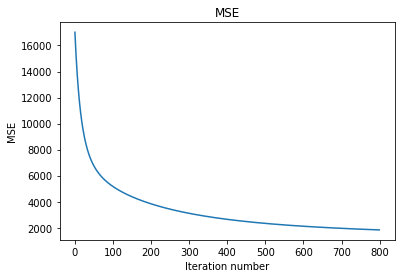

In [165]:
plt.plot(range(len(e_gs)), e_gs)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

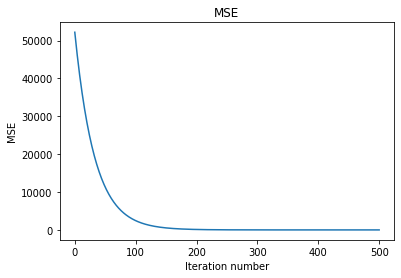

In [166]:
plt.plot(range(len(e_sgs)), e_sgs)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

### По графику видно, что стахостический градиентный спуск сходится быстрее обычного градиентного спуска

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.

In [172]:
class GradientDescentL2:

  metrics = {'mse': Metrics()._mse}

  def __init__(self, X, y, iter_count=1500, alpha=1e-4, result_per_count=100, 
               _lambda=1e-8, metric='mse', listing=True):

    assert metric in self.metrics, f"Metric {metric} is not allowed"

    self.x = X.copy()
    self.y = y.copy()

    # Weights vector 
    self.w = np.random.randn(self.x.shape[0])
    
    # Total iterations
    self.iter_count = iter_count

    # Alpha coeff
    self.alpha = alpha
  
    self.metric = self.metrics[metric]

    self.result_per_count = result_per_count

    self.listing = listing

    self.err = []

    self._lambda = _lambda

  def fit(self):
    n = self.x.shape[1]

    for i in range(self.iter_count):
      y_pred = np.dot(self.w, self.x)
      self.err.append(self.metric(self.y, y_pred))

      self.w -= self.alpha * (1/n * 2 * np.dot((y_pred - y), self.x.T) + self._lambda * self.w )

    return self.err

In [176]:
class StochasticGradientDescentL2:

  metrics = {'mse': Metrics()._mse}

  def __init__(self, X, y, iter_count=1500, qty_in_batch=1, alpha=1e-4, 
               _lambda=1e-8, metric='mse', listing=True):

    assert metric in self.metrics, f"Metric {metric} is not allowed"

    self.x = X.copy()
    self.y = y.copy()

    # Weights vector 
    self.w = np.random.randn(self.x.shape[0])
    
    # Total iterations
    self.iter_count = iter_count

    # Alpha coeff
    self.alpha = alpha

    self.n = self.x.shape[1]
    self.qty_in_batch = qty_in_batch
  
    self.metric = self.metrics[metric]

    self.listing = listing

    self.err = []

    self._lambda = _lambda

  def fit(self):

    n_batch = self.n // self.qty_in_batch

    if self.n % self.qty_in_batch != 0:
      n_batch += 1
    for i in range(self.iter_count + 1 ):
      for b in range(n_batch):
        _start = self.qty_in_batch * b
        _end = self.qty_in_batch * (b + 1)

      x_tmp = self.x[:, _start: _end] 
      y_tmp = self.y[_start : _end]

      y_pred_tmp = np.dot(self.w, x_tmp)
      self.err.append(self.metric(y_tmp, y_pred_tmp))

      self.w -= (self.alpha * (1/self.n * 2 * np.dot((y_pred_tmp - y_tmp), x_tmp.T) + self._lambda * self.w))

    # if self.listing and i % (self.iter_count / 10) == 0:
      # print(i , self.w, err)

    return self.err

In [203]:
gs2 = GradientDescentL2(X, y, alpha=1e-2, iter_count=500)
e_gs2 = gs2.fit()

In [204]:
sgs2 = StochasticGradientDescentL2(X, y, iter_count=500, qty_in_batch=1, alpha=1e-2)
e_sgs2 = sgs2.fit()

Text(0, 0.5, 'MSE')

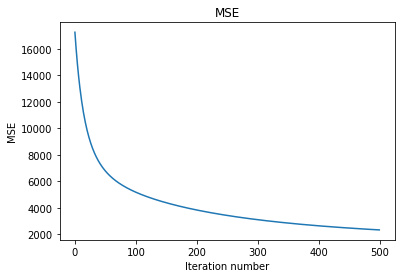

In [205]:
plt.plot(range(len(e_gs2)), e_gs2)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

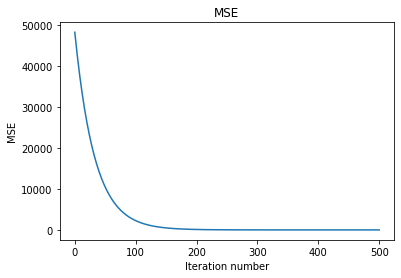

In [206]:
plt.plot(range(len(e_sgs2)), e_sgs2)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

На графике разница не особо заметна